<a href="https://colab.research.google.com/github/bharath967/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
#Loading the necessary libraries 
import numpy as np
import pandas as pd
from numpy import math,unique

from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [97]:
rest=pd.read_csv('/content/drive/MyDrive/Almabetter/zamato/Zomato Restaurant names and Metadata.csv')
review=pd.read_csv('/content/drive/MyDrive/Almabetter/zamato/Zomato Restaurant reviews.csv')

In [98]:
rest.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [99]:
rest.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [100]:
rest.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [101]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [102]:
rest.shape

(105, 6)

In [103]:
#Checking the unique values in both dataframes
for i in rest.columns:
  print(i,rest[i].nunique())

Name 105
Links 105
Cost 29
Collections 42
Cuisines 92
Timings 77


In [104]:
#Here we had cost column with numbers seperated by commas. So we are trying to remove comma which ever is present in Cost column.
#Then we convert Cost column to float
rest['Cost'] = rest['Cost'].str.replace(",","").astype('float64')

In [105]:
#Dropping Links and Timings column as its of not much help.
rest.drop(['Links','Timings'],axis=1,inplace=True)

In [106]:
#Defining a function to display the % of missing values along eith its datatype.
def missing_values_table(df):
        mis_val =df.isna().sum()
        mis_val_percent = 100 *df.isna().sum() / len(df)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table.sort_values('% of Total Values', ascending=False).round(1)
        print (" selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]),"\n\n")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

In [107]:
missing_values_table(rest)

 selected dataframe has 4 columns and 105 




,Missing Values,% of Total Values,Data Type
Collections,54,51.4,object
Name,0,0.0,object
Cost,0,0.0,float64
Cuisines,0,0.0,object


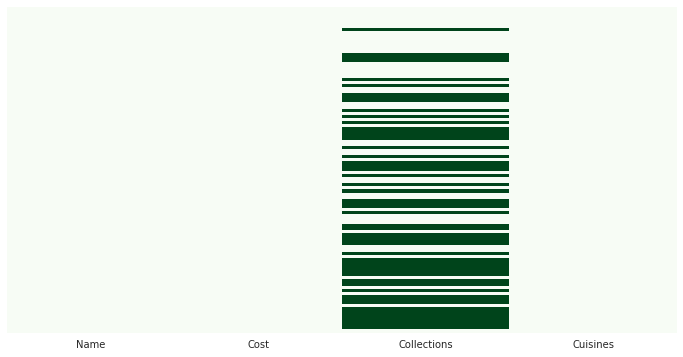

In [108]:
plt.figure(figsize=(12,6))
sns.heatmap(rest.isnull(),cbar=False,yticklabels=False,cmap='Greens');

In [109]:
rest1=rest.copy()

In [110]:
rest.drop('Collections',axis=1,inplace=True)

In [111]:
rest.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800.0,"Chinese, Continental, Kebab, European, South I..."
1,Paradise,800.0,"Biryani, North Indian, Chinese"
2,Flechazo,1300.0,"Asian, Mediterranean, North Indian, Desserts"
3,Shah Ghouse Hotel & Restaurant,800.0,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,Over The Moon Brew Company,1200.0,"Asian, Continental, North Indian, Chinese, Med..."


In [112]:
# changing to int
rest['Cost'] = rest['Cost'].astype('int')

In [113]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      105 non-null    object
 1   Cost      105 non-null    int64 
 2   Cuisines  105 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.6+ KB


In [114]:
#defining a function to treaat outliers wrt columns of a dataframe.

def remove_outlier(df,column):
  
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  plt.title('Before Treating outliers')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() < 3]
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() > -3]
  
  plt.figure(figsize=(15,6))
  
  plt.subplot(1, 2, 1)
  plt.title('After Treating outliers')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])

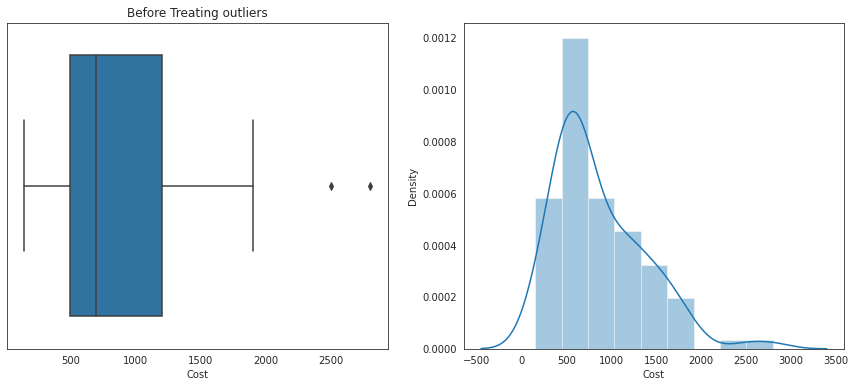

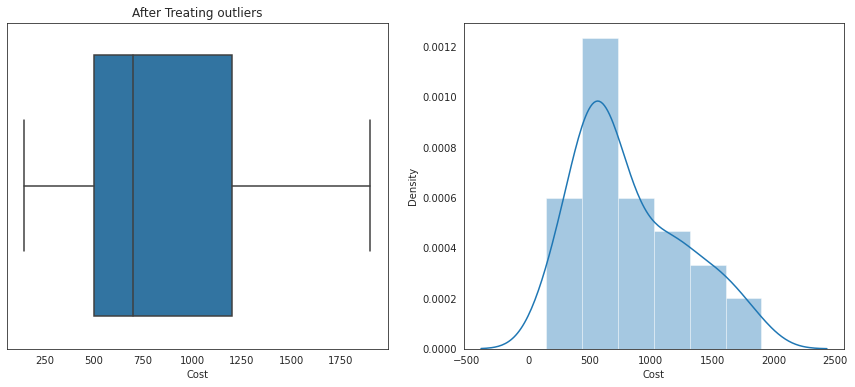

In [115]:
remove_outlier(rest,'Cost')

In [116]:
rest['Cuisines'] = rest['Cuisines'].str.replace(' ','')

In [117]:
rest['Cuisines'] = rest['Cuisines'].str.split(',')

In [118]:
rest['Cuisines']

0      [Chinese, Continental, Kebab, European, SouthI...
1                        [Biryani, NorthIndian, Chinese]
2          [Asian, Mediterranean, NorthIndian, Desserts]
3      [Biryani, NorthIndian, Chinese, Seafood, Bever...
4      [Asian, Continental, NorthIndian, Chinese, Med...
                             ...                        
100                                    [FastFood, Salad]
101                                     [Bakery, Mithai]
102                      [NorthIndian, Biryani, Chinese]
103                                           [FastFood]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

In [119]:
rest2=rest1.copy

In [120]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

In [121]:
rest = rest.join(pd.DataFrame.sparse.from_spmatrix(
    
           mlb.fit_transform(rest.pop('Cuisines')), 
           index=rest.index, columns=mlb.classes_ )
                                                        )

In [122]:
rest.head()

,Name,Cost,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,...,NorthIndian,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,Paradise,800,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,Flechazo,1300,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
4,Over The Moon Brew Company,1200,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [123]:
rest.drop(['Name','Cost'],axis = 1).sum().sort_values(ascending=False)

NorthIndian      61
Chinese          43
Continental      21
Biryani          16
Asian            15
FastFood         15
Italian          14
Desserts         13
SouthIndian       9
Bakery            7
Andhra            6
Mughlai           6
American          6
Cafe              6
Kebab             6
Mediterranean     5
Burger            5
Beverages         5
Salad             5
Momos             4
European          4
Hyderabadi        4
Seafood           4
Sushi             4
Thai              3
StreetFood        2
ModernIndian      2
Japanese          2
IceCream          2
FingerFood        2
BBQ               2
Arabian           2
Mexican           1
Mithai            1
Malaysian         1
Lebanese          1
Juices            1
NorthEastern      1
Indonesian        1
Pizza             1
HealthyFood       1
Goan              1
Spanish           1
Wraps             1
dtype: int64

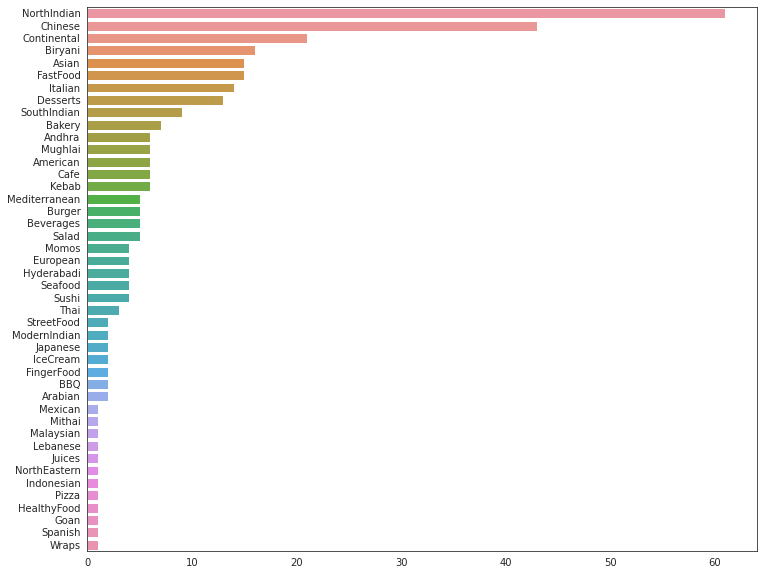

In [124]:
plt.figure(figsize = (12,10))
sns.set_style('white')
sns.barplot(y = rest.drop(['Name','Cost'],axis = 1).sum().sort_values(ascending=False).index,x = rest.drop(['Name','Cost'],axis = 1).sum().sort_values(ascending=False))

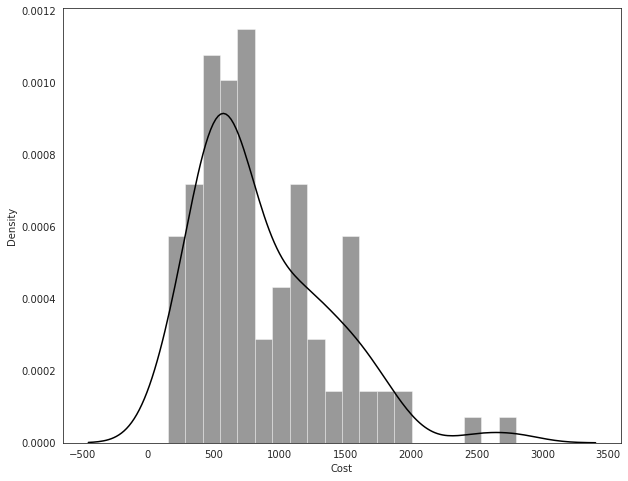

In [125]:
plt.figure(figsize=(10,8))
sns.distplot(rest['Cost'], hist=True, kde=True, color='black', bins=20)

Text(0.5, 1.0, 'Log Transformed - Cost')

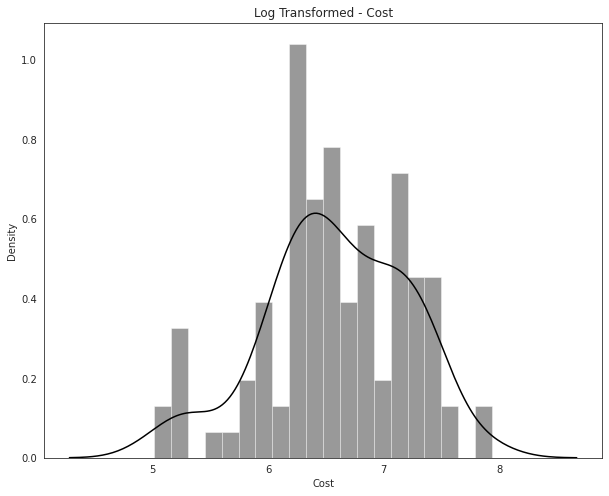

In [126]:
#Log trasformed
plt.figure(figsize=(10,8))
sns.distplot(np.log(rest['Cost']), hist=True, kde=True, color='black', bins=20)
plt.title("Log Transformed - Cost")

In [127]:
#defining a function to treaat outliers wrt columns of a dataframe.

#Z score treatment
def remove_outlier(df,column):
  
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  plt.title('Before Treating outliers')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() < 3]
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() > -3]
  
  plt.figure(figsize=(15,6))
  
  plt.subplot(1, 2, 1)
  plt.title('After Treating outliers')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])

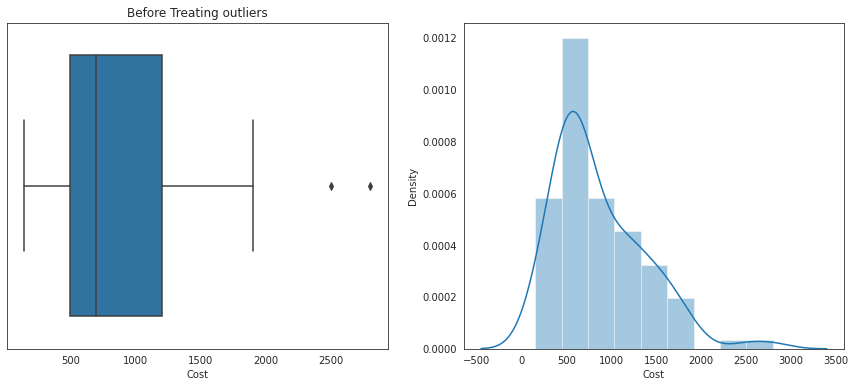

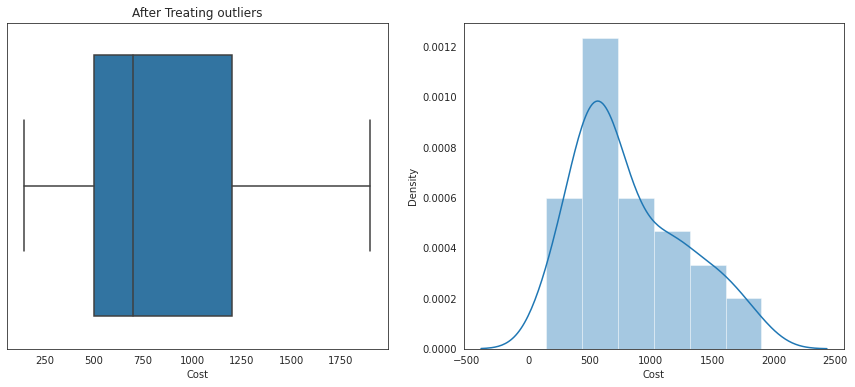

In [128]:
remove_outlier(rest,'Cost')

Text(0.5, 0, 'Cost')

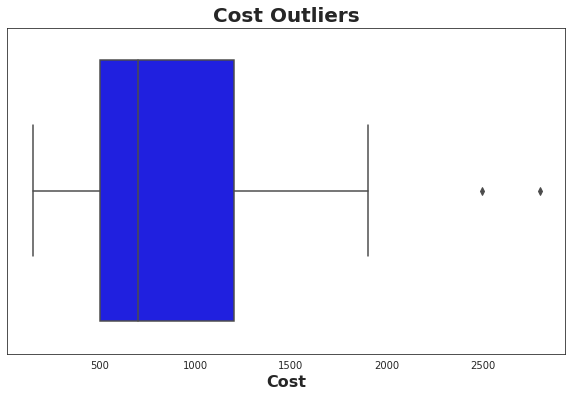

In [129]:
#checking outliers
plt.figure(figsize=(10,6))
sns.boxplot(rest['Cost'], color='b')
plt.title('Cost Outliers',fontsize=20, fontweight='bold')
plt.xlabel('Cost',fontsize=16, fontweight='bold')

In [130]:
Cuisines_df = rest1['Cuisines'].value_counts().reset_index()
Cuisines_df.head()

,index,Cuisines
0,"North Indian, Chinese",4
1,North Indian,3
2,"Ice Cream, Desserts",2
3,"Biryani, North Indian, Chinese",2
4,"South Indian, North Indian, Chinese",2


In [131]:
rest1.columns

Index(['Name', 'Cost', 'Collections', 'Cuisines'], dtype='object')

In [132]:
Cuisines_df = rest1['Cuisines'].value_counts().reset_index()

In [133]:
Cuisines_df.head()

,index,Cuisines
0,"North Indian, Chinese",4
1,North Indian,3
2,"Ice Cream, Desserts",2
3,"Biryani, North Indian, Chinese",2
4,"South Indian, North Indian, Chinese",2


In [134]:
Cuisines_df.rename(columns={'index': 'Cuisines_name','Cuisines': 'Count'}, inplace=True)

In [135]:
Cuisines_df.head()

,Cuisines_name,Count
0,"North Indian, Chinese",4
1,North Indian,3
2,"Ice Cream, Desserts",2
3,"Biryani, North Indian, Chinese",2
4,"South Indian, North Indian, Chinese",2


[Text(0, 0, 'North Indian, Chinese'),
 Text(0, 0, 'North Indian'),
 Text(0, 0, 'Fast Food'),
 Text(0, 0, 'Biryani, North Indian,\n Chinese'),
 Text(0, 0, 'South Indian,\n North Indian, Chinese')]

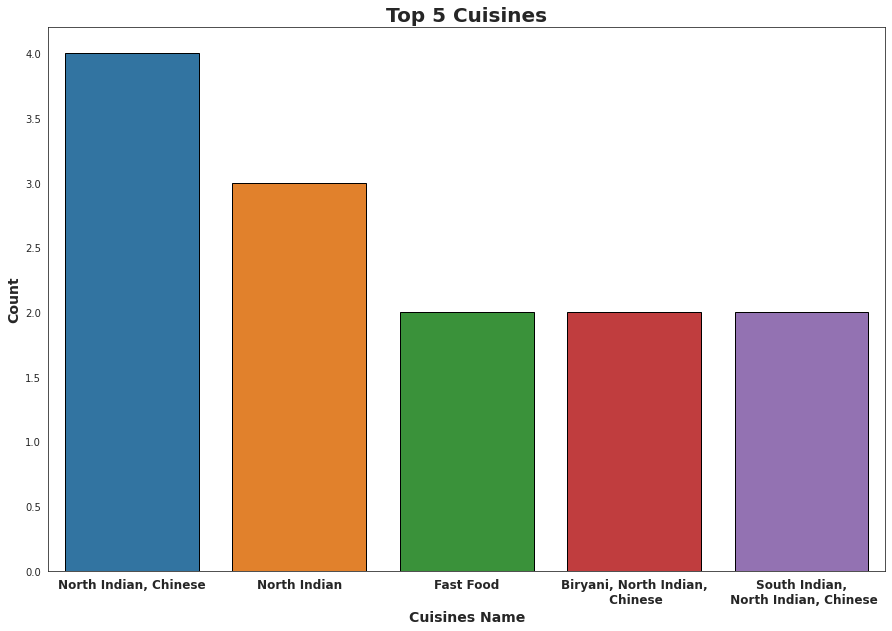

In [136]:
#barplot top 5 cuisines
plt.figure(figsize=(15,10))
sns.barplot(x='Cuisines_name',y='Count',data=Cuisines_df[:5], edgecolor='k')
plt.title('Top 5 Cuisines', fontweight='bold',fontsize=20)

ax = plt.subplot()
LabelsList = ['North Indian, Chinese','North Indian','Fast Food','Biryani, North Indian,\n Chinese','South Indian,\n North Indian, Chinese']
ax.set_xlabel('Cuisines Name',fontweight='bold',fontsize=14)
ax.set_ylabel('Count',fontweight='bold',fontsize=14)
ax.xaxis.set_ticklabels(LabelsList,fontweight='bold',fontsize=12)

In [137]:
#bottom 5 Cuisines
Cuisines_df.tail()

,Cuisines_name,Count
87,"Biryani, South Indian, North Indian, Chinese, ...",1
88,"Italian, North Indian, South Indian, Asian",1
89,"North Indian, Fast Food",1
90,"Arabian, North Indian, Chinese",1
91,"Thai, Asian, Chinese, Malaysian",1


[Text(0, 0, 'Biryani, South Indian,\n North Indian,\n Chinese, Andhra'),
 Text(0, 0, 'Italian, North Indian,\n South Indian,\n Asian'),
 Text(0, 0, 'North Indian, \nFast Food'),
 Text(0, 0, 'Arabian, North\n Indian, Chinese'),
 Text(0, 0, 'Thai, Asian,\n Chinese, Malaysian')]

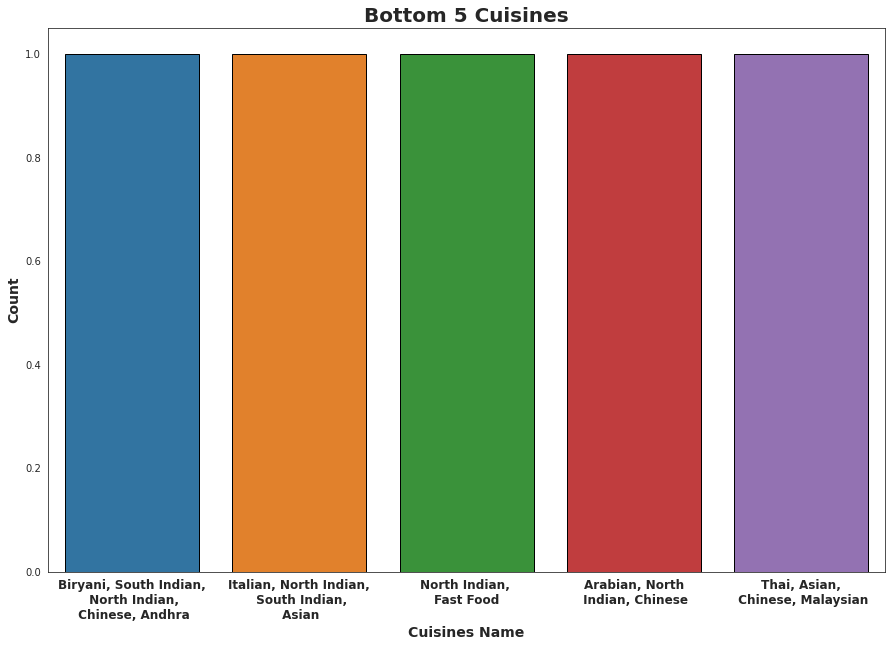

In [138]:
#barplot bottom 5 cuisines
plt.figure(figsize=(15,10))
sns.barplot(x='Cuisines_name',y='Count',data=Cuisines_df[-5:], edgecolor='k')

plt.title('Bottom 5 Cuisines', fontweight='bold',fontsize=20)

ax = plt.subplot()
LabelsList1 = ['Biryani, South Indian,\n North Indian,\n Chinese, Andhra','Italian, North Indian,\n South Indian,\n Asian','North Indian, \nFast Food','Arabian, North\n Indian, Chinese','Thai, Asian,\n Chinese, Malaysian']
ax.set_xlabel('Cuisines Name',fontweight='bold',fontsize=14)
ax.set_ylabel('Count',fontweight='bold',fontsize=14)
ax.xaxis.set_ticklabels(LabelsList1,fontweight='bold',fontsize=12)

In [139]:
rest3=pd.read_csv('/content/drive/MyDrive/Almabetter/zamato/Zomato Restaurant names and Metadata.csv')

In [140]:
review['Rating'] = review['Rating'].replace('Like','4')
review['Rating'] = review['Rating'].astype('float')

In [141]:
#exploring null rows in reviews column
review[review['Review'].isnull()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
2360,Amul,Lakshmi Narayana,NaN,5.0,0 Reviews,7/29/2018 18:00,0
5799,Being Hungry,Surya,NaN,5.0,"4 Reviews , 4 Followers",7/19/2018 23:55,0
6449,Hyderabad Chefs,Madhurimanne97,NaN,5.0,1 Review,7/23/2018 16:29,0
6489,Hyderabad Chefs,Harsha,NaN,5.0,1 Review,7/8/2018 21:19,0
7954,Olive Garden,ARUGULLA PRAVEEN KUMAR,NaN,3.0,"1 Review , 1 Follower",8/9/2018 23:25,0
8228,Al Saba Restaurant,Suresh,NaN,5.0,1 Review,7/20/2018 22:42,0
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


In [142]:
#dropping null rows in reviews first
review.dropna(subset = ["Review"], inplace=True)

In [143]:
# checking
review.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [144]:
#rating is in object type
review['Rating'].unique()

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5])

In [145]:
#like should not be here
# correcting and changing the datatype
review['Rating'] = review['Rating'].replace('Like','4')
review['Rating'] = review['Rating'].astype('float')

In [146]:
#let's drop time as it would not be required
review.drop(['Time'],axis=1,inplace=True)

In [147]:
# groupby restaurant and ratings to get average ratings
restaurant_ratings = review.groupby('Restaurant')['Rating'].mean().reset_index()
restaurant_ratings.rename(columns={'Restaurant':'Name'},inplace=True)
#sort restaurants according to ratings and getting top 5 restaurants
restaurant_ratings.sort_values(by='Rating',ascending = False).head()

,Name,Rating
3,AB's - Absolute Barbecues,4.88
11,B-Dubs,4.81
2,"3B's - Buddies, Bar & Barbecue",4.76
67,Paradise,4.70
35,Flechazo,4.66


In [148]:
#adding an average rating feature in restaurant names and metadata dataframe
rest = rest.merge(restaurant_ratings,on='Name',how='left')
rest.rename(columns={'Rating':'Avg Rating'},inplace=True)
rest.head(1)

,Name,Cost,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,...,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps,Avg Rating
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,4.28


In [149]:
# info on the final dataset
rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype           
---  ------         --------------  -----           
 0   Name           105 non-null    object          
 1   Cost           105 non-null    int64           
 2   American       105 non-null    Sparse[int64, 0]
 3   Andhra         105 non-null    Sparse[int64, 0]
 4   Arabian        105 non-null    Sparse[int64, 0]
 5   Asian          105 non-null    Sparse[int64, 0]
 6   BBQ            105 non-null    Sparse[int64, 0]
 7   Bakery         105 non-null    Sparse[int64, 0]
 8   Beverages      105 non-null    Sparse[int64, 0]
 9   Biryani        105 non-null    Sparse[int64, 0]
 10  Burger         105 non-null    Sparse[int64, 0]
 11  Cafe           105 non-null    Sparse[int64, 0]
 12  Chinese        105 non-null    Sparse[int64, 0]
 13  Continental    105 non-null    Sparse[int64, 0]
 14  Desserts       105 non-null    Sparse[int6

In [150]:
#five restaurants have not been rated by people yet
rest['Avg Rating'].fillna(0,inplace=True)

In [151]:
#head
review.head(1)

,Restaurant,Reviewer,Review,Rating,Metadata,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",0


In [152]:
# splitting meta data into reviews and followers seperately
review['Reviews'], review['Followers'] = review['Metadata'].str.split(',').str
review['Reviews'] = pd.to_numeric(review['Reviews'].str.split(' ').str[0])
review['Followers'] = pd.to_numeric(review['Followers'].str.split(' ').str[1])

review.head(1)

,Restaurant,Reviewer,Review,Rating,Metadata,Pictures,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",0,1,2.0


In [153]:
#drop Metadata
review.drop(['Metadata'],axis=1,inplace=True)

In [154]:
#create a seperate detaframe for reviewers and their activity
reviewers_df = review.groupby(['Reviewer','Reviews','Followers'])['Rating'].mean().reset_index()
reviewers_df.sort_values(by=['Reviews','Followers','Rating'],ascending=[False,False,True],inplace=True,ignore_index=True)

#sorting out the crtics of the industry, these are the people with most reviews written and most followers who have given low rating on an avg
reviewers_df.head(3)

,Reviewer,Reviews,Followers,Rating
0,Anvesh Chowdary,1031,1654.0,3.333333
1,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,685,794.0,2.000000
2,Abc098,665,2275.0,3.000000


In [155]:
# sorting out the best restaurants
best_restaurants = rest[['Name','Avg Rating','Cost']]
best_restaurants.sort_values(by=['Avg Rating','Cost'],ascending=[False,True],inplace=True,ignore_index=True)
#top10
best_restaurants = best_restaurants.loc[0:9,:]
best_restaurants

,Name,Avg Rating,Cost
0,AB's - Absolute Barbecues,4.88,1500
1,B-Dubs,4.81,1600
2,"3B's - Buddies, Bar & Barbecue",4.76,1100
3,Paradise,4.70,800
4,Flechazo,4.66,1300
5,The Indi Grill,4.60,1500
6,Zega - Sheraton Hyderabad Hotel,4.45,1750
7,Over The Moon Brew Company,4.34,1200
8,Beyond Flavours,4.28,800
9,Cascade - Radisson Hyderabad Hitec City,4.26,1800


Text(0.5, 1.0, 'Best Restaurants in Hyderabad')

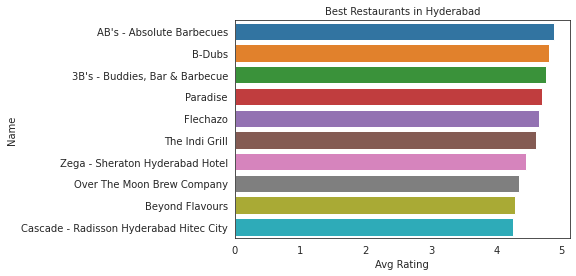

In [156]:
#visualizing the best restaurants 
sns.barplot(x='Avg Rating', y='Name',data=best_restaurants)
plt.title('Best Restaurants in Hyderabad',size=10)

Text(0.5, 1.0, 'Distribution of Average Restaurant Ratings in Hyderabad')

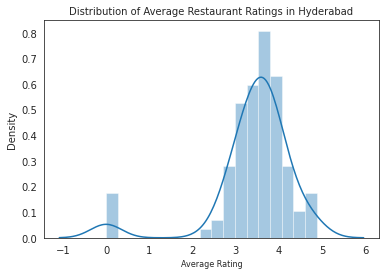

In [157]:
#distribution of Average Ratings in Hyderabad
sns.distplot(x=rest['Avg Rating'])
plt.xlabel('Average Rating',size=8)
plt.title('Distribution of Average Restaurant Ratings in Hyderabad',size=10)

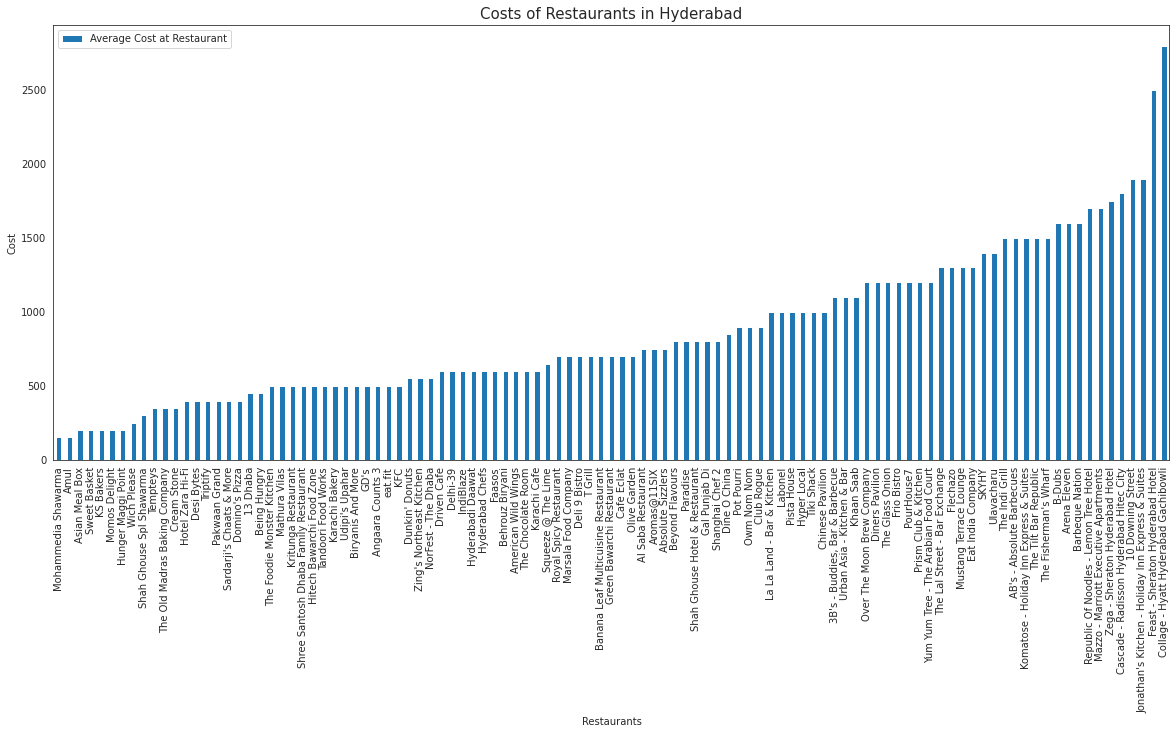

In [158]:
#visualizing Restaurant Costs
rest.sort_values(['Cost']).plot(x="Name", y=["Cost"], kind="bar", figsize=(20, 8))
plt.xlabel('Restaurants',size=10)
plt.ylabel('Cost',size=10)
plt.title('Costs of Restaurants in Hyderabad',size=15)
plt.legend(['Average Cost at Restaurant'])

In [159]:
#top 5 cheapest restaurants
rest[['Name','Cost']].sort_values(['Cost']).head()

,Name,Cost
89,Mohammedia Shawarma,150
23,Amul,150
54,Asian Meal Box,200
101,Sweet Basket,200
59,KS Bakers,200


In [160]:
#top 5 costliest restaurants
rest[['Name','Cost']].sort_values(['Cost'],ascending=False).head()

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800
56,Feast - Sheraton Hyderabad Hotel,2500
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
18,10 Downing Street,1900
91,Cascade - Radisson Hyderabad Hitec City,1800


Text(0.5, 1.0, 'Distribution of Restaurant Costs in Hyderabad')

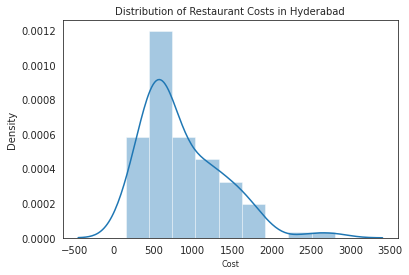

In [161]:
#distribution of Cost in Hyderabad
sns.distplot(x=rest['Cost'])
plt.xlabel('Cost',size=8)
plt.title('Distribution of Restaurant Costs in Hyderabad',size=10)

In [162]:
# filtering out the restaurants with avg rating less than 3 and sorting them out acc to high cost
low_rating_df = rest[rest['Avg Rating'] < 3].sort_values(['Avg Rating', 'Cost'],ascending=[True,False],ignore_index=True)
low_rating_df.head(1)

,Name,Cost,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,...,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps,Avg Rating
0,Republic Of Noodles - Lemon Tree Hotel,1700,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0


In [163]:
#drop restaurants that were not rated yet
low_rating_df =low_rating_df[low_rating_df['Avg Rating'] != 0].reset_index(drop=True)
low_rating_df

,Name,Cost,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,...,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps,Avg Rating
0,Hotel Zara Hi-Fi,400,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.400
1,Asian Meal Box,200,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.580
2,Pakwaan Grand,400,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.710
3,Mathura Vilas,500,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2.820
4,Behrouz Biryani,600,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.825
5,The Chocolate Room,600,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.830
6,Shree Santosh Dhaba Family Restaurant,500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.830
7,KFC,500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.850
8,Club Rogue,900,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.880
9,Desi Bytes,400,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.900


Text(0.5, 1.0, 'Restaurants with Low Ratings')

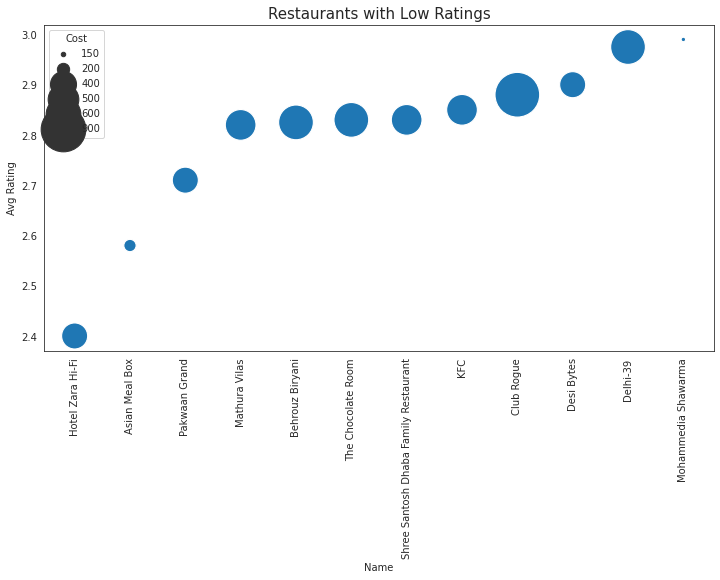

In [164]:
#visualizing the restaurants
plt.figure(figsize=(12,6))
sns.scatterplot(data=low_rating_df, x="Name", y="Avg Rating", size="Cost",alpha=1, legend=True, sizes=(20, 2000))
plt.xticks(rotation=90)
plt.title('Restaurants with Low Ratings',size=15)

In [165]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [166]:
#fitting numerical columns
numerical_cols = ['Cost','Avg Rating']
scaler = MinMaxScaler()
scaler.fit(rest[numerical_cols])
scaled_df = rest.copy()
scaled_df[numerical_cols] = scaler.transform(rest[numerical_cols])

In [167]:
#setting name as index for both datasets
rest['Index'] = list(range(0,105))
rest.set_index(['Index','Name'],inplace=True)
scaled_df['Index'] = list(range(0,105))
scaled_df.set_index(['Index','Name'],inplace=True)

In [168]:
#importing kmeans
from sklearn.cluster import KMeans

In [169]:
#Within Cluster Sum of Squared Errors for different values of k
#let's first take two variables only 
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(scaled_df[['Cost','Avg Rating']])
    wcss.append(km.inertia_)

Text(0, 0.5, 'WCSS')

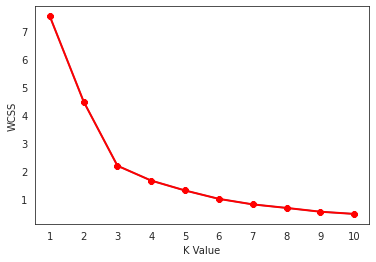

In [170]:
#The elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

In [171]:
#create a copy
kmeans_df1 = scaled_df.copy()

In [172]:
#fit predict kmeans on 5 clusters
model1 = KMeans(n_clusters=5,random_state= 42)
pred_1 = model1.fit_predict(kmeans_df1[['Cost', 'Avg Rating']])
kmeans_df1["label"] = pred_1

Text(0.5, 1.0, 'Cost vs Average Rating')

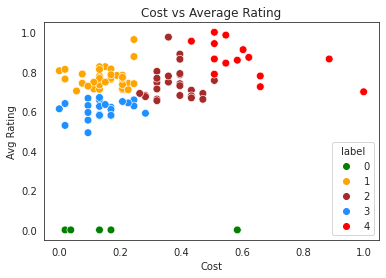

In [173]:
#Scatterplot of the clusters
sns.scatterplot(x = 'Cost',y = 'Avg Rating',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = kmeans_df1  ,s = 60 )
plt.xlabel('Cost')
plt.ylabel('Avg Rating') 
plt.title('Cost vs Average Rating')

The clusters are pretty distinguishable from each other. Since the input variables were just two, it is easier to distinguish and interpret them.

Label 0 are those restaurants that were in the names dataset but weren't reviewed.
Label 1 are the restaurants that have good ratings with low pricing.
Label 2 are fine dining restaurants with good ratings and average pricing.
Label 3 restaurants are small food joints with low pricing but had average ratings.
Label 4 are expensive restaurants that also had above-average ratings.

In [174]:
#Within Cluster Sum of Squared Errors for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(scaled_df)
    wcss.append(km.inertia_)

Text(0, 0.5, 'WCSS')

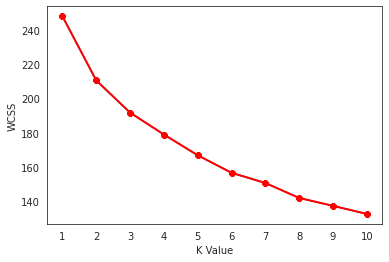

In [175]:
#The elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

No elbow in for K-means does not mean that there are no clusters in the data
No elbow means that the algorithm used cannot separate clusters
K-means becomes less effective at distinguishing between examples as the dimensions are increased. This negative consequence of high-dimensional data is called the curse of dimensionality.

In [176]:
#principal component analysis
from sklearn.decomposition import PCA
#choosing 3 components
pca = PCA(n_components=3)
#fitting pca
pca_result = pca.fit_transform(scaled_df)
#variance ratio
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.18771026 0.11705454 0.07627711]
Cumulative variance explained by 3 principal components: 38.10%


Parameter: {'n_clusters': 2} Score 0.40225135416863533
Parameter: {'n_clusters': 3} Score 0.43925232103592854
Parameter: {'n_clusters': 4} Score 0.48398701364467706
Parameter: {'n_clusters': 5} Score 0.5165566654261904
Parameter: {'n_clusters': 6} Score 0.530327038435634
Parameter: {'n_clusters': 7} Score 0.5284229987127136
Parameter: {'n_clusters': 8} Score 0.5232711090613763
Parameter: {'n_clusters': 9} Score 0.5004365281708631
Parameter: {'n_clusters': 10} Score 0.46650963309190036


Text(0.5, 0, 'Number of Clusters')

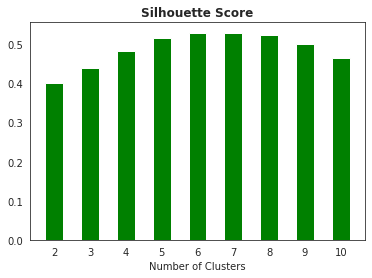

In [177]:
#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,11))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans(random_state = 11)     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(pca_result)          # fit model 
    score = silhouette_score(pca_result, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [score]       # store all the scores
    print('Parameter:', p, 'Score', score)
    # check p which has the best score
    if score > best_score:
        best_score = score
        best_grid = p

# plotting 
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='green', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')

In [178]:
# fitting KMeans    
kmeans_pca = KMeans(n_clusters=6,random_state=11)
kmeans_pca.fit(pca_result)

KMeans(n_clusters=6, random_state=11)

In [179]:
#fit predict kmeans 
kmeans_pca_df = pd.DataFrame(pca_result,columns=['PC1','PC2','PC3'],index=rest.index)
pred_pca = kmeans_pca.fit_predict(pca_result)
kmeans_pca_df["label"] = pred_pca

Text(0.5, 0, 'PC3')

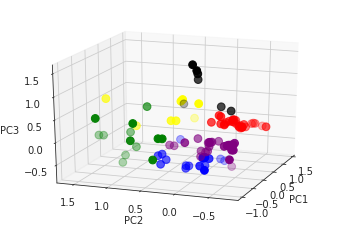

In [180]:
#plotting 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 0], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 0], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 0], c='purple', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 1], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 1], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 1], c='red', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 2], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 2], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 2], c='blue', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 3], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 3], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 3], c='green', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"]== 4], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 4], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 4], c='yellow', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"]== 5], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 5], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 5], c='black', s=60)
ax.view_init(20, 200)
plt.xlabel("PC1")
plt.ylabel("PC2")
ax.set_zlabel('PC3')

In [181]:
#let's merge the labels to the original dataset and explore
kmeans_pca_df.head(2)

,,PC1,PC2,PC3,label
Index,Name,,,,
0,Beyond Flavours,-0.891232,0.423463,-0.304134,3
1,Paradise,-0.819246,-0.591959,0.105941,0


In [182]:
#joining the cluster labels to names dataframe
names_df = rest.join(kmeans_pca_df['label'])
names_df.head(2)

,,Cost,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,...,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps,Avg Rating,label
Index,Name,,,,,,,,,,,,,,,,,,,,,
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,4.28,3
1,Paradise,800,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,4.70,0


In [183]:
#value counts for different clusters
names_df['label'].value_counts()

0    30
1    28
2    19
3    13
4     8
5     7
Name: label, dtype: int64

Cluster Exploration
Cluster 0

In [184]:
#exploring cluster 0 
names_df[names_df['label']==0].head(3)

,,Cost,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,...,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps,Avg Rating,label
Index,Name,,,,,,,,,,,,,,,,,,,,,
1,Paradise,800,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,4.70,0
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,3.21,0
8,Hyper Local,1000,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,3.64,0


Cluster 0 Observation:

The restaurants in cluster 0 have mostly continental and fast foods available with them.
The average rating is 3.42 and the average cost is 942 INR which includes an outlier of cost 2500 INR and median cost of 600 INR. This means the restaurants are basically cheap in nature in this cluster beside one.

Cluster 1

In [185]:
#exploring cluster  
names_df[names_df['label']==1].head(3)

,,Cost,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,...,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps,Avg Rating,label
Index,Name,,,,,,,,,,,,,,,,,,,,,
7,Shah Ghouse Spl Shawarma,300,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.430,1
9,Cream Stone,350,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.845,1
15,KFC,500,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2.850,1


Cluster 1 Observation:

The restaurants in cluster 1 have mostly North Indian and other complementary foods available with them.
The average rating is 3.63 and the average cost is 823 INR. These restaurants are slightly higher in prices than cluster 0.

cluster 2

In [186]:
#exploring cluster 2 
names_df[names_df['label']==2].head(3)

,,Cost,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,...,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps,Avg Rating,label
Index,Name,,,,,,,,,,,,,,,,,,,,,
2,Flechazo,1300,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.66,2
6,eat.fit,500,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,3.20,2
10,Sardarji's Chaats & More,400,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,3.25,2


Cluster 2 Observation:

The restaurants in cluster 2 have all the popular cuisines available with them including North Indian, Chinese and Continental.
The average rating is 3.77 which is better than the other two clusters and the average cost is 1331 INR. These restaurants are fine dining restaurants.

Text(0.5, 1.0, 'Overall Ratings Count')

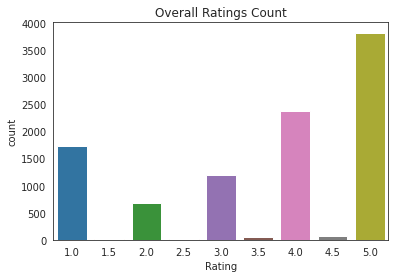

In [189]:
#visualizing different ratings count
sns.countplot(x=review['Rating'])
plt.title('Overall Ratings Count')

In [190]:
#grouping reviewers with low rating and high reviews and followers
critics_df = review.groupby(['Reviewer','Reviews','Followers'])['Rating'].mean().reset_index().sort_values(by=['Rating','Reviews','Followers'],
            ascending=[True,False,False],ignore_index=True)
critics_df = critics_df[:30]
critics_df.head()

,Reviewer,Reviews,Followers,Rating
0,Sumit,401,2736.0,1.0
1,D.S,195,2079.0,1.0
2,Ram Raju.,115,282.0,1.0
3,Farhaan Nasir (bankruptfoodie),107,503.0,1.0
4,Suyash Dhandhania,92,495.0,1.0


Text(0.5, 1.0, 'Critics in the Industry')

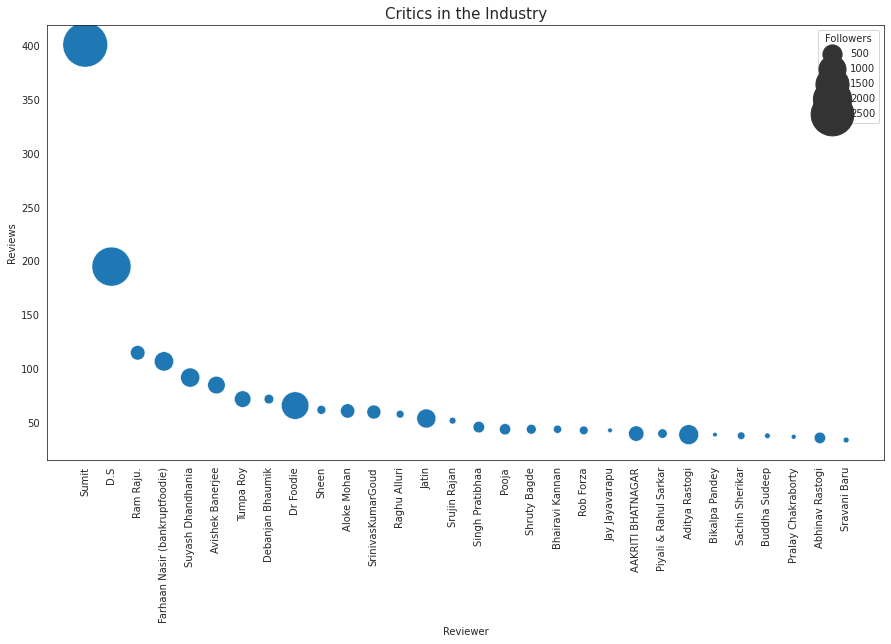

In [191]:
#visualizing critics through scatterplot
plt.figure(figsize=(15,8))
sns.scatterplot(data=critics_df, x="Reviewer", y="Reviews", size="Followers",alpha=1, legend=True, sizes=(20, 2000))
plt.xticks(rotation=90)
ax.axes.get_xaxis().set_visible(False)
plt.title('Critics in the Industry',size=15)

In [192]:
review.head()

,Restaurant,Reviewer,Review,Rating,Pictures,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,3,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0,2,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,0,1,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,0,3,2.0


In [193]:
review.head()

,Restaurant,Reviewer,Review,Rating,Pictures,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,3,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0,2,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,0,1,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,0,3,2.0


In [194]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9955 non-null   object 
 1   Reviewer    9955 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9955 non-null   float64
 4   Pictures    9955 non-null   int64  
 5   Reviews     9955 non-null   int64  
 6   Followers   8381 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 880.2+ KB


In [195]:
review.isna().sum()

Restaurant       0
Reviewer         0
Review           0
Rating           0
Pictures         0
Reviews          0
Followers     1574
dtype: int64

In [196]:
review = review[['Review', 'Rating']]
review.head()

,Review,Rating
0,"The ambience was good, food was quite good . h...",5.0
1,Ambience is too good for a pleasant evening. S...,5.0
2,A must try.. great food great ambience. Thnx f...,5.0
3,Soumen das and Arun was a great guy. Only beca...,5.0
4,Food is good.we ordered Kodi drumsticks and ba...,5.0


In [198]:
review['Rating'] = review['Rating'].astype(float)

In [199]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  9955 non-null   object 
 1   Rating  9955 non-null   float64
dtypes: float64(1), object(1)
memory usage: 491.4+ KB


In [200]:
review['Rating'].value_counts()

5.0    3826
4.0    2374
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

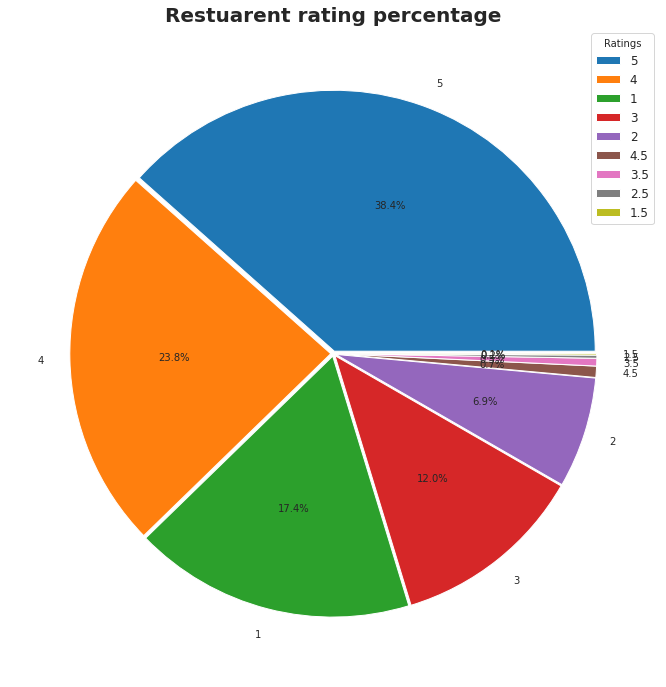

In [201]:
plt.figure(figsize=(12,12))
plt.pie(review['Rating'].value_counts(), labels = ['5','4','1','3','2','4.5','3.5','2.5','1.5'], autopct ='%1.1f%%', explode = (0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01))
plt.legend(labels = ['5','4','1','3','2','4.5','3.5','2.5','1.5'],title='Ratings',fontsize=12, loc='upper right' )
plt.title("Restuarent rating percentage",fontweight='bold',fontsize=20)
plt.show()

In [202]:
#label the rating range
pd.cut(review['Rating'], bins=3).value_counts(sort=False)

(0.996, 2.333]    2428
(2.333, 3.667]    1258
(3.667, 5.0]      6269
Name: Rating, dtype: int64

In [203]:
labels = ['bad','average','good']
review['Rating_label'] = pd.cut(review['Rating'], bins=3, labels=labels)
review.head()

,Review,Rating,Rating_label
0,"The ambience was good, food was quite good . h...",5.0,good
1,Ambience is too good for a pleasant evening. S...,5.0,good
2,A must try.. great food great ambience. Thnx f...,5.0,good
3,Soumen das and Arun was a great guy. Only beca...,5.0,good
4,Food is good.we ordered Kodi drumsticks and ba...,5.0,good


In [204]:
review= review.drop(["Rating"], axis =1)